<a href="https://colab.research.google.com/github/elangbijak4/Graph-Analytics-Research/blob/main/Kode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies
!pip install networkx pandas matplotlib

In [2]:
# Import the necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset from survei.csv
# Pastikan file survei.csv sudah di-upload ke Google Colab
df = pd.read_csv('Survei.csv')

# Display the dataset to verify
df.head()

,Nama,Jurusan,Semester,Kualitas Sistem,Penggunaan,Responsivitas,Fleksibilitas,Informasi,Kepuasan,Klasifikasi Kepuasan
0,Berliani Afindasaputri,Keperawatan,3,Sangat Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Puas
1,Ryek Diah mustika,Ppkn,3,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Puas
2,Putri Angraini Aziz,Teknik Informatika,3,Setuju,Setuju,Setuju,Sangat Setuju,Setuju,Setuju,Puas
3,Harnelia,Teknik Informatika,3,Tidak Setuju,Tidak Setuju,Tidak Setuju,Setuju,Setuju,Tidak Setuju,Tidak Puas
4,Mursawal,Teknik Informatika,3,Setuju,Setuju,Setuju,Setuju,Setuju,Setuju,Puas


Number of nodes before cleaning: 497
Number of edges before cleaning: 41850
Number of nodes after cleaning: 496
Number of edges after cleaning: 41850


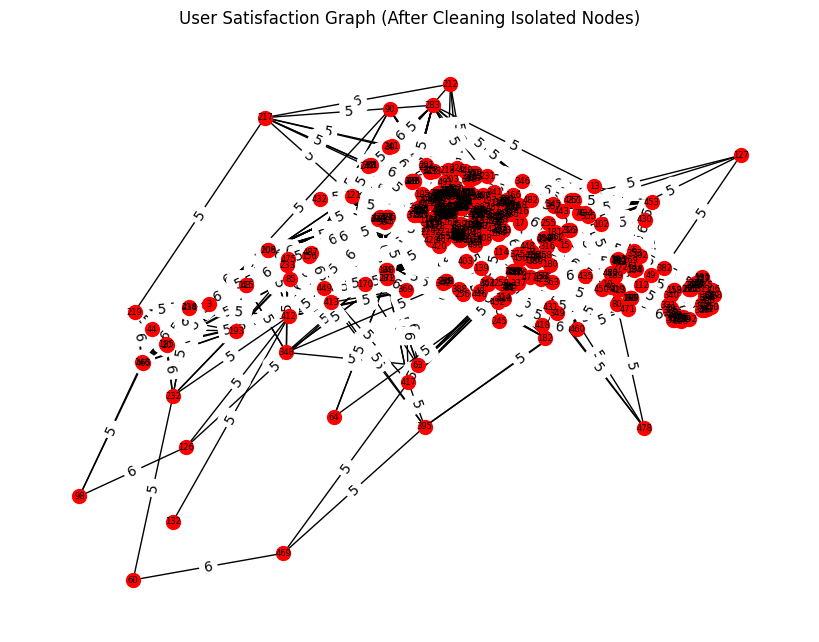

In [3]:
# Inisialisasi graf kosong
G = nx.Graph()

# Tambahkan simpul berdasarkan data nama pengguna
for index, row in df.iterrows():
    user_id = index  # Gunakan index sebagai ID
    G.add_node(user_id, jurusan=row['Jurusan'], semester=row['Semester'],
               kualitas_sistem=row['Kualitas Sistem'], penggunaan=row['Penggunaan'],
               responsivitas=row['Responsivitas'], fleksibilitas=row['Fleksibilitas'],
               informasi=row['Informasi'], kepuasan=row['Kepuasan'],
               klasifikasi=row['Klasifikasi Kepuasan'])

# Tambahkan sisi antara pengguna jika memiliki penilaian yang sama di semua kategori
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        similarity = (df.iloc[i, 3:] == df.iloc[j, 3:]).sum()  # Membandingkan atribut
        if similarity >= 5:  # Threshold minimal kesamaan atribut
            G.add_edge(i, j, weight=similarity)  # Menggunakan ID sebagai edge

# Tampilkan informasi graf sebelum membersihkan vertex terpencil
print(f"Number of nodes before cleaning: {G.number_of_nodes()}")
print(f"Number of edges before cleaning: {G.number_of_edges()}")

# Mengidentifikasi vertex terpencil (node dengan degree 0)
isolated_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]

# Hapus vertex terpencil dari graf
G.remove_nodes_from(isolated_nodes)

# Tampilkan informasi graf setelah membersihkan vertex terpencil
print(f"Number of nodes after cleaning: {G.number_of_nodes()}")
print(f"Number of edges after cleaning: {G.number_of_edges()}")

# Plot graf
pos = nx.spring_layout(G)  # Layout untuk graf

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=100, node_color='red', font_size=6, font_weight='regular')

# Menggambarkan bobot sisi
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("User Satisfaction Graph (After Cleaning Isolated Nodes)")
plt.show()

In [4]:
# Analisis konektivitas graf
connected_components = list(nx.connected_components(G))
print(f"Connected Components: {connected_components}")

# Cek apakah graf terhubung sepenuhnya
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

# Centralitas (mengukur node mana yang paling terhubung)
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for user, centrality in degree_centrality.items():
    print(f"{user}: {centrality:.2f}")

# Analisis kepuasan paling umum (node yang terhubung dengan banyak orang)
most_connected_user = max(degree_centrality, key=degree_centrality.get)
print(f"The most connected user (most similar satisfaction): {most_connected_user}")

Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2